In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
from datetime import datetime
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization

In [18]:
file_list = glob('train/*.jpg')

In [19]:
dog_cat = np.zeros((len(file_list),300,300,3))
dog_cat_type = []
for i,file in enumerate(file_list):
    dt = plt.imread(file)
    dt = cv2.resize(dt,(300,300))
    dog_cat[i] = dt 
    if 'cat' in file:
        dog_cat_type.append(0)
    else: 
        dog_cat_type.append(1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dog_cat,dog_cat_type)

In [21]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

array([1])

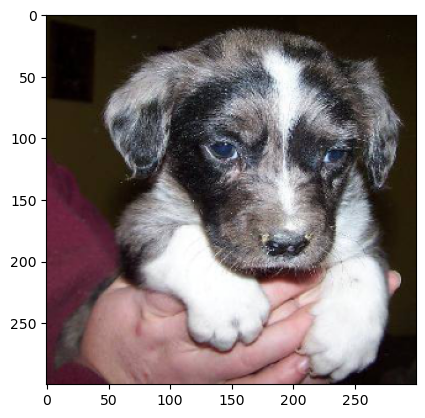

In [22]:
plt.imshow(X_train[0].astype('int'))
y_train[0]

In [23]:
model = Sequential(
    [
        Conv2D(30,(5,5),activation='relu',input_shape=(300,300,3)),
        BatchNormalization(),
        MaxPooling2D((5,5)),
        Conv2D(50,(3,3),activation='relu'),
        BatchNormalization(),
        MaxPooling2D((5,5)),
        Flatten(),
        Dense(64,activation='relu'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')
    ]
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 30)      2280      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 30)     120       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 50)        13550     
                                                                 
 batch_normalization_1 (Batc  (None, 57, 57, 50)       200       
 hNormalization)                                                 
                                                        

In [25]:
opt = 'adam'
loss = 'binary_crossentropy'
model.compile(optimizer=opt,
             loss=loss,
             metrics=['accuracy'])

In [26]:
model.fit(X_train,
         y_train,
         epochs=20,
         batch_size=128)

Epoch 1/20
 8/24 [=========>....................] - ETA: 2:07 - loss: 2.5429 - accuracy: 0.5098


KeyboardInterrupt



In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
conv = VGG16(include_top=False,
             weights='imagenet',
             input_shape=(150,150,3),)

In [ ]:
conv.summary()

In [ ]:
x = np.random.randn(1,150,150,3)

In [ ]:
conv.predict(x).shape